# Sales Analysis

### Loading Data and doing a comprehensive check on it

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
#loading the salse data into pandas
file = pd.read_csv('salesforcourse.csv')

In [3]:
#Checking the content of the sales data
file

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [4]:
#The table has two index columns, (original index form python and index from the file)

In [5]:
#Checking the datatype of each column
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [6]:
#Checking for anomalies in the table
file.nunique()

index               34867
Date                  576
Year                    2
Month                  12
Customer Age           70
Customer Gender         2
Country                 4
State                  45
Product Category        3
Sub Category           17
Quantity                3
Unit Cost             882
Unit Price           5175
Cost                  417
Revenue              3023
Column1              1281
dtype: int64

In [7]:
#Is there Null values in this data?
file.isnull().values.any()

True

In [8]:
#Which columns columns has Null values?
file.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [9]:
#Are there any duplicates in the dataset
file.duplicated().any()

False

### Data Cleaning

In [10]:
#Dropping the first column in the file ('index')
file.drop(['index'], axis =1, inplace = True)

In [11]:
#Check to comfirm one of the index columns is removed.
file

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [12]:
#Examing the Null values 
file[file['Column1'].isnull()].head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [13]:
#Comfirming that column1 doesn't contain meaningful data.
file[file['Column1'].notnull()].head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
312,1/11/2016,2016.0,January,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0,2370.0
313,1/11/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0,398.0
314,1/18/2016,2016.0,January,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0,3023.0
315,1/18/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0,294.0
316,1/18/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0,167.0


In [14]:
#Dropping 'Column1' because the majority of its content are Null, and the once not Null are duplicate values of Revenue 
file.drop(['Column1'], axis =1, inplace = True)

In [15]:
#locating the Nulls in the other part of the data.
file[file['Date'].isnull()]

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095


In [16]:
#Dropping the Nulls in the data
file = file.dropna()

In [17]:
#Confirming that all Nulls has been taken care of.
file.isnull().sum()

Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

In [18]:
#Converting the 'Year' and the 'Customer Age' into int, while the 'Date' into Date type
file['Date'] = pd.to_datetime(file['Date'])

file['Year'] = file['Year'].astype(int)

file['Customer Age'] = file['Customer Age'].astype(int)

C:\Users\Joshua.Aiyeetan\AppData\Local\Temp\ipykernel_21432\3775416339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Date'] = pd.to_datetime(file['Date'])
C:\Users\Joshua.Aiyeetan\AppData\Local\Temp\ipykernel_21432\3775416339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Year'] = file['Year'].astype(int)
C:\Users\Joshua.Aiyeetan\AppData\Local\Temp\ipykernel_21432\3775416339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
#Comfirming the datetypes are now corrected
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  int32         
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  int32         
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34866 non-null  float64       
dtypes: datetime64[ns](1), 

### Analysis

In [20]:
#Creating two columns 1. Profit and 2. Profit Margin
#A column to calculate the profit made from each sale.
file['Profit'] = file['Revenue'] - file['Cost']

#A column for the profit margin
file['Profit Margin'] = file['Unit Price'] - file['Unit Cost']

C:\Users\Joshua.Aiyeetan\AppData\Local\Temp\ipykernel_21432\302573133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Profit'] = file['Revenue'] - file['Cost']
C:\Users\Joshua.Aiyeetan\AppData\Local\Temp\ipykernel_21432\302573133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Profit Margin'] = file['Unit Price'] - file['Unit Cost']


In [21]:
#Checking the new columns created
file

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Profit Margin
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,29.000000
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,4.000000
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,1.330000
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,29.000000
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015,March,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,-562.0,-562.000000
34862,2016-02-07,2016,February,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,-349.0,-174.500000
34863,2015-03-13,2015,March,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,-466.0,-466.000000
34864,2015-04-05,2015,April,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,-367.0,-122.333333


In [22]:
#Saving the Clean data as an CSV.
file.to_csv('Cleaned Sales Data.csv')

In [23]:
#Breakdown by Year.
sales = file[['Cost','Month','Year','Revenue','Profit','Quantity']]
sales.groupby(sales['Year']).sum()

,Cost,Revenue,Profit,Quantity
Year,,,,
2015,9659151.0,9947771.0,288620.0,30063.0
2016,10423823.0,12396805.0,1972982.0,39757.0


In [24]:
#Monthly Sales, breakdown into Cost, Revenue, Profit and Quantity
sales = sales.groupby(['Year','Month']).sum().reset_index()
sales

,Year,Month,Cost,Revenue,Profit,Quantity
0,2015,April,289089.0,284143.0,-4946.0,345.0
1,2015,August,1182259.0,1248185.0,65926.0,4655.0
2,2015,December,2048649.0,2116097.0,67448.0,6796.0
3,2015,February,263937.0,259857.0,-4080.0,296.0
4,2015,January,236328.0,230549.0,-5779.0,268.0
5,2015,July,773950.0,789054.0,15104.0,1838.0
6,2015,June,346447.0,337756.0,-8691.0,411.0
7,2015,March,258522.0,250358.0,-8164.0,299.0
8,2015,May,328431.0,320629.0,-7802.0,421.0
9,2015,November,1384447.0,1438928.0,54481.0,4975.0


In [25]:
#What are the Top Performing Products by Profit?
product = file[['Product Category','Sub Category','Quantity','Profit']]
product.groupby(['Product Category','Sub Category']).sum().sort_values('Profit', ascending = False).reset_index()

,Product Category,Sub Category,Quantity,Profit
0,Accessories,Helmets,8387.0,518475.0
1,Accessories,Tires and Tubes,22213.0,512124.0
2,Clothing,Jerseys,4033.0,300876.0
3,Bikes,Mountain Bikes,5499.0,144627.0
4,Accessories,Bottles and Cages,10558.0,129567.0
5,Bikes,Road Bikes,6119.0,98166.0
6,Bikes,Touring Bikes,2673.0,94808.0
7,Clothing,Shorts,1129.0,87044.0
8,Accessories,Hydration Packs,786.0,72341.0
9,Accessories,Fenders,1494.0,71403.0


In [26]:
# Calculating profit margin for each product sub category
margin_sub_Category = (file.groupby('Sub Category')['Profit'].sum() / file.groupby('Sub Category')['Revenue'].sum())*100

# Sort categories by profit margin in descending order
profit_margin_by_category = margin_sub_Category.sort_values(ascending=False)

#list of product sub categories ranked by their profit margin from highest to lowest
print(round(profit_margin_by_category))

Sub Category
Bike Racks           25.0
Fenders              22.0
Gloves               20.0
Helmets              19.0
Bottles and Cages    18.0
Hydration Packs      18.0
Tires and Tubes      18.0
Cleaners             18.0
Caps                 17.0
Bike Stands          17.0
Jerseys              16.0
Vests                16.0
Socks                16.0
Shorts               13.0
Touring Bikes         4.0
Mountain Bikes        3.0
Road Bikes            3.0
dtype: float64


In [27]:
#Profit by Country broken down into quantity, cost, revenue and profit
product = product = file[['Country','Sub Category','Quantity','Revenue','Profit']]
product.groupby(['Country']).sum().sort_values('Profit', ascending = False).reset_index()

,Country,Quantity,Revenue,Profit
0,Germany,10386.0,4244510.0,958825.0
1,United States,36239.0,10377742.0,701165.0
2,United Kingdom,12822.0,4276220.0,328955.0
3,France,10373.0,3446104.0,272657.0


In [28]:
#Based on Revenue, US has the higest quantity of goods sold, highest revenue but when it comes to profit, they are the 2nd
product.groupby(['Country']).sum().sort_values('Revenue', ascending = False).reset_index()

,Country,Quantity,Revenue,Profit
0,United States,36239.0,10377742.0,701165.0
1,United Kingdom,12822.0,4276220.0,328955.0
2,Germany,10386.0,4244510.0,958825.0
3,France,10373.0,3446104.0,272657.0


### Visualization

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

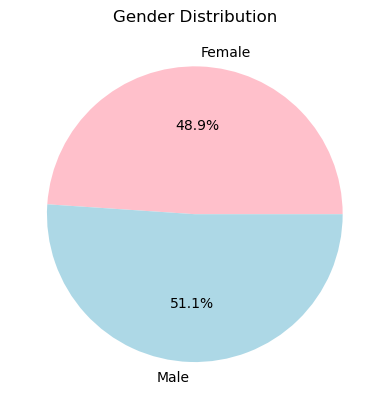

In [30]:
#What is the Gender distribution of their customers?
gender_counts = file.groupby('Customer Gender').size()

labels = ['Female', 'Male']
colors = ['pink', 'lightblue']
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%')

# Set the title
plt.title('Gender Distribution')

# Display the pie chart
plt.show()

In [31]:
#Trend of sales overtime
Trend = file.groupby('Date')['Revenue'].sum().reset_index()

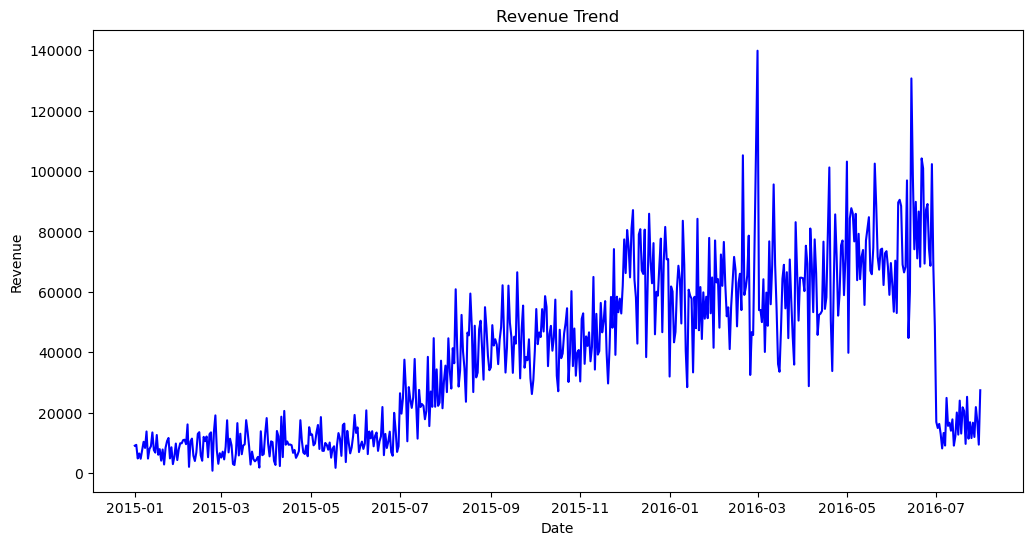

In [32]:
# Create line chart of sales over time
fig1 = plt.figure(figsize=(12, 6))

plt.plot(Trend['Date'], Trend['Revenue'], color = 'blue')
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
#plt.xticks(pd.date_range(start=Trend['Date'].min(), end=Trend['Date'].max(), freq='1M'))
plt.show()

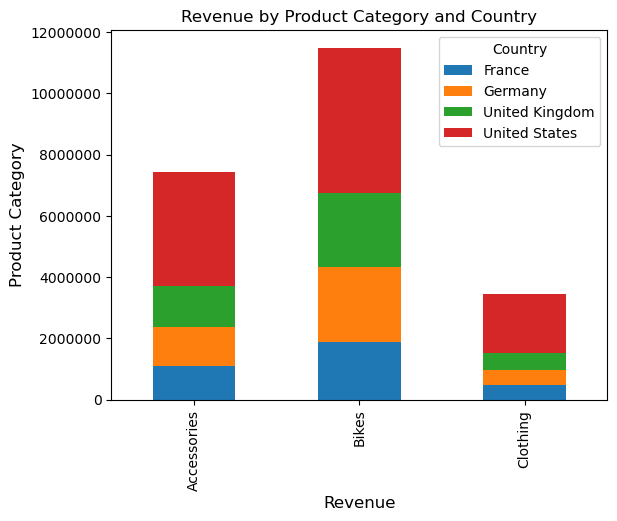

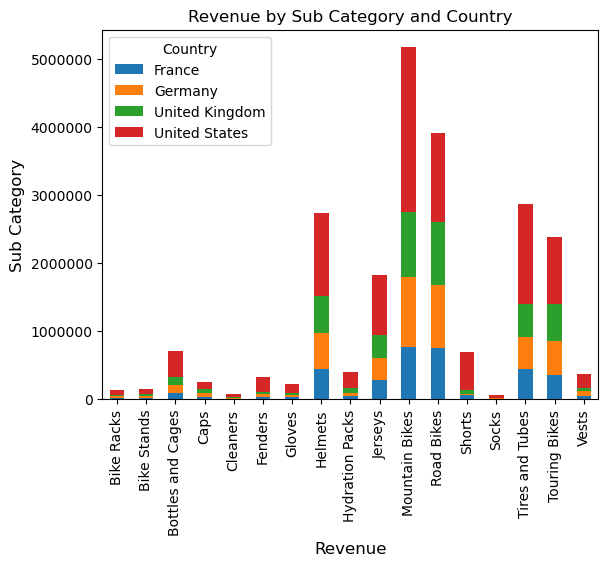

In [33]:
#Country's Revenue by Product Category
sales_by_category_country = file.groupby(['Product Category', 'Country'])['Revenue'].sum().unstack()

sales_by_category_country.plot(kind='bar', stacked=True)
plt.title('Revenue by Product Category and Country')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Turn off scientific notation on the x-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)


#Sales by Sub Category
sales_by_category_country = file.groupby(['Sub Category', 'Country'])['Revenue'].sum().unstack()

sales_by_category_country.plot(kind='bar', stacked=True)
plt.title('Revenue by Sub Category and Country')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Sub Category', fontsize=12)

# Turn off scientific notation on the x-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)


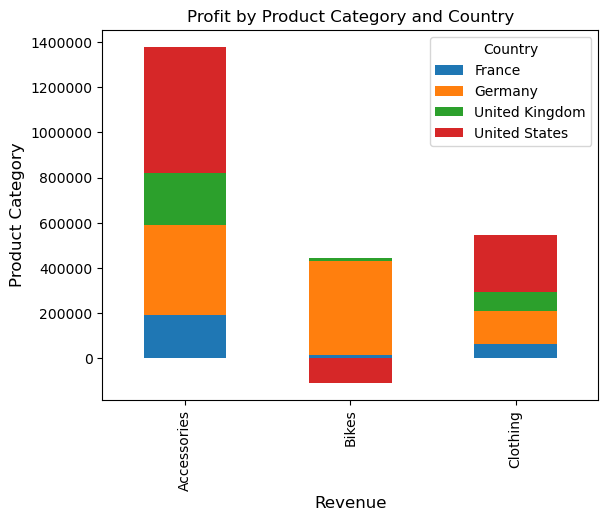

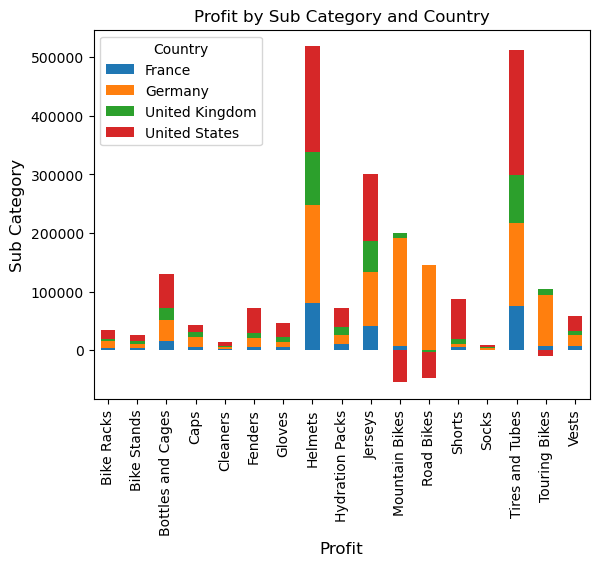

In [34]:
#Country's Profit by Product Category
sales_by_category_country = file.groupby(['Product Category', 'Country'])['Profit'].sum().unstack()

sales_by_category_country.plot(kind='bar', stacked=True)
plt.title('Profit by Product Category and Country')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Turn off scientific notation on the x-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)


#Profit by Sub Category
sales_by_category_country = file.groupby(['Sub Category', 'Country'])['Profit'].sum().unstack()

sales_by_category_country.plot(kind='bar', stacked=True)
plt.title('Profit by Sub Category and Country')
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Sub Category', fontsize=12)

# Turn off scientific notation on the x-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

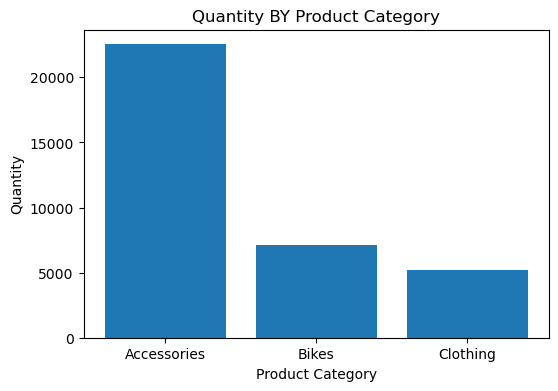

In [35]:
#Sales by Category
sales_by_category = file.groupby('Product Category')['Quantity'].count().reset_index()
fig3 = plt.figure(figsize = (6,4))
plt.title('Quantity BY Product Category')
plt.bar(sales_by_category['Product Category'], sales_by_category['Quantity'])
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

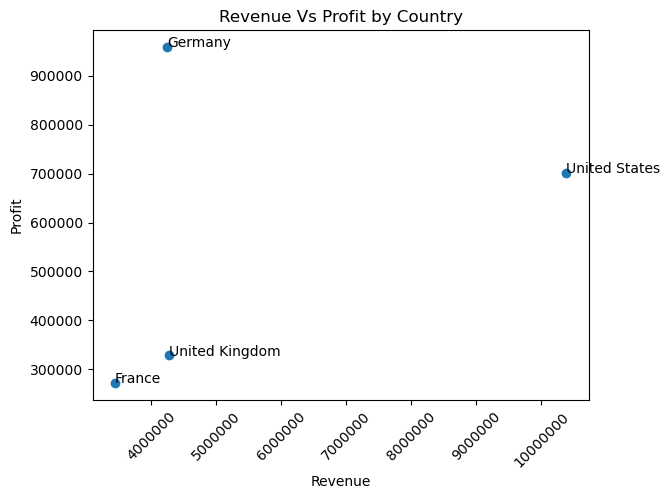

In [36]:
sales_profit_by_country = file.groupby(['Country'])[['Revenue', 'Profit']].sum()
plt.title('Revenue Vs Profit by Country')
plt.scatter(x=sales_profit_by_country['Revenue'], y=sales_profit_by_country['Profit'])

# Add labels for each country
for i, txt in enumerate(sales_profit_by_country.index):
    plt.annotate(txt, (sales_profit_by_country['Revenue'][i], sales_profit_by_country['Profit'][i]))

plt.xlabel('Revenue')
plt.ylabel('Profit')

plt.xticks(rotation=45)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

#plt.scatter(x='Revenue', y='Profit', data=sales_profit_by_country, s=100)

plt.show()


Text(0, 0.5, 'Number of Occurrences')

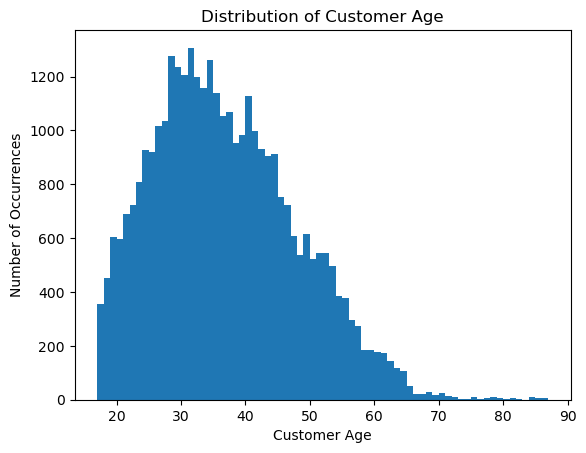

In [37]:
#What is the customera age distribution?
plt.hist(x='Customer Age', data=file, bins=70)

plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Number of Occurrences')

### Observation and Recommendations

- Based on this Analysis, it evident that a high revenue does not necessarily translate to high profit. "The Company recorded the highest revenue from the United States but there highest profit was from Germany".

- The Company needs to consider and find ways to reduce their cost of production without compromising quality in the United States in other to increase their profit margin.

- Product with High Profit margins should be prioritized in marketing and sales efforts
